In [1]:
#! python -m pip install numpy matplotlib
#! python -m pip install nltk==3.5
#!pip install wordcloud
#nltk.download('punkt')
#pip install -U scikit-learn
#nltk.download('wordnet')
#pip install -U scikit-learn
#pip install scipy
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')


import pandas as pd
import numpy as np
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
import sklearn
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from collections import defaultdict


In [2]:
# Reading the dataset
df = pd.read_csv("C:/Users/Bird/Dropbox/School/ADMN5016/public.ticket_articles.csv", delimiter=';', engine="python")
df.head()

,id,ticket_id,type_id,sender_id,from,to,cc,subject,reply_to,message_id,...,content_type,references,body,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at
0,11,8,10,1,Aaron Visser,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,"This sounds good, looking forward to working o...",t,NaN,8,8,NaN,2021-04-16 11:27:51.595,2021-04-16 11:27:51.595
1,12,9,1,1,Ben Hall <bhall@queensu.ca>,Parvin Mousavi <mousavi@queensu.ca>,QSC Help <qschelp@queensu.ca>,RE: Spam from cs,NaN,<YTBPR01MB3487703EAC0C6DD1C92A1715D1499@YTBPR0...,...,text/html,NaN,"<div>\n<p>Hi Parvin,</p>\n<p> </p>\n<p>I did h...",f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-19 13:37:57.353,2021-04-19 13:37:57.353
2,13,10,1,1,Ben Hall <bhall@queensu.ca>,QSC Help <qschelp@queensu.ca>,NaN,FW: Compromised Host: 130.15.4.52,NaN,<YTBPR01MB34872802F65C9030F45D981CD1499@YTBPR0...,...,text/html,NaN,<div>\n<p>For our records. We can close this t...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-19 13:38:35.117,2021-04-19 13:38:35.117
3,1,1,5,2,Nicole Braun <nicole.braun@zammad.org>,NaN,NaN,NaN,NaN,NaN,...,text/plain,NaN,Welcome!\n\n Thank you for choosing Zammad.\n...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,4,2,2.0,2021-04-14 19:29:52.645,2021-04-15 18:47:54.963
4,5,4,5,2,Nicole Braun <nicole.braun@zammad.org>,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,"\n<div>Dear Zack,</div>\n<br>\n<div>This is a ...",f,NaN,2,2,2.0,2021-04-15 18:53:15.852,2021-04-15 18:53:15.852


In [3]:
df

,id,ticket_id,type_id,sender_id,from,to,cc,subject,reply_to,message_id,...,content_type,references,body,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at
0,11,8,10,1,Aaron Visser,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,"This sounds good, looking forward to working o...",t,NaN,8,8,NaN,2021-04-16 11:27:51.595,2021-04-16 11:27:51.595
1,12,9,1,1,Ben Hall <bhall@queensu.ca>,Parvin Mousavi <mousavi@queensu.ca>,QSC Help <qschelp@queensu.ca>,RE: Spam from cs,NaN,<YTBPR01MB3487703EAC0C6DD1C92A1715D1499@YTBPR0...,...,text/html,NaN,"<div>\n<p>Hi Parvin,</p>\n<p> </p>\n<p>I did h...",f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-19 13:37:57.353,2021-04-19 13:37:57.353
2,13,10,1,1,Ben Hall <bhall@queensu.ca>,QSC Help <qschelp@queensu.ca>,NaN,FW: Compromised Host: 130.15.4.52,NaN,<YTBPR01MB34872802F65C9030F45D981CD1499@YTBPR0...,...,text/html,NaN,<div>\n<p>For our records. We can close this t...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-19 13:38:35.117,2021-04-19 13:38:35.117
3,1,1,5,2,Nicole Braun <nicole.braun@zammad.org>,NaN,NaN,NaN,NaN,NaN,...,text/plain,NaN,Welcome!\n\n Thank you for choosing Zammad.\n...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,4,2,2.0,2021-04-14 19:29:52.645,2021-04-15 18:47:54.963
4,5,4,5,2,Nicole Braun <nicole.braun@zammad.org>,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,"\n<div>Dear Zack,</div>\n<br>\n<div>This is a ...",f,NaN,2,2,2.0,2021-04-15 18:53:15.852,2021-04-15 18:53:15.852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,6939,1996,1,2,Mahdieh Safarzadehvahed <mahdieh.safarzadehvah...,Ben Hall <bhall@queensu.ca>,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",Re: Request to have access to a server,NaN,<YT1PR01MB4123DB3617DEA5B8445785549B879@YT1PR0...,...,text/html,NaN,"<div>\n<div>Great, thank you so much!</div>\n<...",f,---\nsend-auto-response: true\nis-auto-respons...,878,878,NaN,2023-03-23 15:36:19.532,2023-03-23 15:36:19.532
6821,6942,1997,1,1,Aaron Visser <aaron.visser@queensu.ca>,QSC Help <qschelp@queensu.ca>,NaN,Automatic reply: Welcome the the CASLab GPU Cl...,NaN,<2359873568454340a8bbf393e635c2fe@YT3PR01MB102...,...,text/html,NaN,"<div dir=""ltr"">\n<div>\n<span>Thank you for yo...",f,---\nsend-auto-response: false\nis-auto-respon...,8,8,NaN,2023-03-23 16:00:31.247,2023-03-23 16:00:31.247
6822,6943,1998,1,2,Gordon Bennett <21geb7@queensu.ca>,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",NaN,IDLE Unable to Start,NaN,<YT3PR01MB9427B430964C3CC1B6574D44EE879@YT3PR0...,...,text/html,NaN,"<div>Good afternoon,</div><div> </div><div>I a...",f,---\nsend-auto-response: true\nis-auto-respons...,1206,1206,NaN,2023-03-23 17:33:08.801,2023-03-23 17:33:08.801
6823,6944,1993,1,1,Lindsey Kelly <lindsey.kelly@queensu.ca>,"Mackenzie Tummers <8mct1@queensu.ca>, ""help@cs...",NaN,Re: Desktop PC installation for Dr. Mohammad Z...,NaN,<YTBPR01MB3133CA59093508E31E98054283879@YTBPR0...,...,text/html,NaN,"<div>Hi Mackenzie,</div><div> </div><div>I'm c...",f,---\nsend-auto-response: true\nis-auto-respons...,1193,1193,NaN,2023-03-23 17:55:48.135,2023-03-23 17:55:48.135


In [4]:
i = df[(df.sender_id == 1)].index
i

Int64Index([   0,    1,    2,    7,    9,   10,   11,   12,   13,   14,
            ...
            6806, 6807, 6808, 6812, 6814, 6817, 6819, 6821, 6823, 6824],
           dtype='int64', length=3702)

In [5]:
c = df[(df.sender_id == 2)].index
c

Int64Index([   3,    4,    5,    6,    8,   23,   27,   33,   34,   37,
            ...
            6805, 6809, 6810, 6811, 6813, 6815, 6816, 6818, 6820, 6822],
           dtype='int64', length=3119)

In [6]:
df_clean = df.drop(i)

In [7]:
df_clean

,id,ticket_id,type_id,sender_id,from,to,cc,subject,reply_to,message_id,...,content_type,references,body,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at
3,1,1,5,2,Nicole Braun <nicole.braun@zammad.org>,NaN,NaN,NaN,NaN,NaN,...,text/plain,NaN,Welcome!\n\n Thank you for choosing Zammad.\n...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,4,2,2.0,2021-04-14 19:29:52.645,2021-04-15 18:47:54.963
4,5,4,5,2,Nicole Braun <nicole.braun@zammad.org>,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,"\n<div>Dear Zack,</div>\n<br>\n<div>This is a ...",f,NaN,2,2,2.0,2021-04-15 18:53:15.852,2021-04-15 18:53:15.852
5,6,5,5,2,<ups@ups.com>,Users,NaN,NaN,NaN,NaN,...,text/html,NaN,UPS called my cell phone and said they couldn'...,t,NaN,8,8,10.0,2021-04-15 20:53:01.96,2021-04-15 20:53:19.923
6,7,6,5,2,Nicole Braun <nicole.braun@zammad.org>,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,"\n<div>Dear Aaron,</div>\n<br>\n<div>This is a...",f,NaN,2,2,2.0,2021-04-15 20:59:53.563,2021-04-15 20:59:53.563
8,9,7,5,2,Nicole Braun <nicole.braun@zammad.org>,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,"\n<div>Dear Aaron,</div>\n<br>\n<div>This is a...",f,NaN,2,2,2.0,2021-04-15 21:01:23.062,2021-04-15 21:01:23.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,6934,1983,1,2,Noreen Haun <noreen.haun@queensu.ca>,"Doug Martin <doug.martin@queensu.ca>, ""help@cs...",Nancy Churchman <nancy.churchman@queensu.ca>,RE: New email account for Research please,NaN,<YT3PR01MB605060AD95BF86E412379C079B879@YT3PR0...,...,text/html,NaN,"<div>\n<p>Thanks so much, Doug. I appreciate i...",f,---\nsend-auto-response: true\nis-auto-respons...,31,31,NaN,2023-03-23 13:45:19.059,2023-03-23 13:45:19.059
6816,6935,1996,1,2,Mahdieh Safarzadehvahed <mahdieh.safarzadehvah...,"Ben Hall <bhall@queensu.ca>, Mohammad Zulkerni...",NaN,Re: Request to have access to a server,NaN,<YT1PR01MB41233F494AEF96E38148000A9B879@YT1PR0...,...,text/html,NaN,"<div>Hello Ben,<div> </div>\n<div>Hope you are...",f,---\nsend-auto-response: true\nis-auto-respons...,878,878,NaN,2023-03-23 14:34:32.182,2023-03-23 14:34:32.182
6818,6937,1996,1,2,Mahdieh Safarzadehvahed <mahdieh.safarzadehvah...,Ben Hall <bhall@queensu.ca>,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",Re: Request to have access to a server,NaN,<YT1PR01MB41237458F4DCA68BA8BE34B59B879@YT1PR0...,...,text/html,NaN,<div>Cyber physical system security<br>\n</div...,f,---\nsend-auto-response: true\nis-auto-respons...,878,878,NaN,2023-03-23 15:29:15.71,2023-03-23 15:29:15.71
6820,6939,1996,1,2,Mahdieh Safarzadehvahed <mahdieh.safarzadehvah...,Ben Hall <bhall@queensu.ca>,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",Re: Request to have access to a server,NaN,<YT1PR01MB4123DB3617DEA5B8445785549B879@YT1PR0...,...,text/html,NaN,"<div>\n<div>Great, thank you so much!</div>\n<...",f,---\nsend-auto-response: true\nis-auto-respons...,878,878,NaN,2023-03-23 15:36:19.532,2023-03-23 15:36:19.532


In [8]:
tech = df.drop(c)
tech

,id,ticket_id,type_id,sender_id,from,to,cc,subject,reply_to,message_id,...,content_type,references,body,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at
0,11,8,10,1,Aaron Visser,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,"This sounds good, looking forward to working o...",t,NaN,8,8,NaN,2021-04-16 11:27:51.595,2021-04-16 11:27:51.595
1,12,9,1,1,Ben Hall <bhall@queensu.ca>,Parvin Mousavi <mousavi@queensu.ca>,QSC Help <qschelp@queensu.ca>,RE: Spam from cs,NaN,<YTBPR01MB3487703EAC0C6DD1C92A1715D1499@YTBPR0...,...,text/html,NaN,"<div>\n<p>Hi Parvin,</p>\n<p> </p>\n<p>I did h...",f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-19 13:37:57.353,2021-04-19 13:37:57.353
2,13,10,1,1,Ben Hall <bhall@queensu.ca>,QSC Help <qschelp@queensu.ca>,NaN,FW: Compromised Host: 130.15.4.52,NaN,<YTBPR01MB34872802F65C9030F45D981CD1499@YTBPR0...,...,text/html,NaN,<div>\n<p>For our records. We can close this t...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-19 13:38:35.117,2021-04-19 13:38:35.117
7,8,6,10,1,Aaron Visser,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,good test. closed.,t,NaN,8,8,NaN,2021-04-15 21:00:22.277,2021-04-15 21:00:22.277
9,10,8,1,1,Ben Hall <bhall@queensu.ca>,QSC Help <qschelp@queensu.ca>,NaN,Fwd: Data,NaN,<e81f9156-da1f-2243-5e07-efae30999fb4@queensu.ca>,...,text/html,NaN,<p>Starting a ticket for me (along with Aaron ...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-16 11:11:30.213,2021-04-16 11:18:01.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,6936,1996,1,1,Ben Hall <bhall@queensu.ca>,Mahdieh Safarzadehvahed <mahdieh.safarzadehvah...,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",Re: Request to have access to a server,NaN,<YT3PR01MB10281A77CAD6110419063F538D1879@YT3PR...,...,text/html,NaN,"<div>\n<p>Hello Mahdieh,</p>\n<p> </p>\n<p>Whi...",f,---\nsend-auto-response: true\nis-auto-respons...,7,7,NaN,2023-03-23 15:23:19.104,2023-03-23 15:23:19.104
6819,6938,1996,1,1,Ben Hall <bhall@queensu.ca>,Mahdieh Safarzadehvahed <mahdieh.safarzadehvah...,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",Re: Request to have access to a server,NaN,<YT3PR01MB10281C868BEEB9830B7194A34D1879@YT3PR...,...,text/html,NaN,"<div>\n<p>Ah, CISC 850. Thank you. Someone wil...",f,---\nsend-auto-response: true\nis-auto-respons...,7,7,NaN,2023-03-23 15:35:12.034,2023-03-23 15:35:12.034
6821,6942,1997,1,1,Aaron Visser <aaron.visser@queensu.ca>,QSC Help <qschelp@queensu.ca>,NaN,Automatic reply: Welcome the the CASLab GPU Cl...,NaN,<2359873568454340a8bbf393e635c2fe@YT3PR01MB102...,...,text/html,NaN,"<div dir=""ltr"">\n<div>\n<span>Thank you for yo...",f,---\nsend-auto-response: false\nis-auto-respon...,8,8,NaN,2023-03-23 16:00:31.247,2023-03-23 16:00:31.247
6823,6944,1993,1,1,Lindsey Kelly <lindsey.kelly@queensu.ca>,"Mackenzie Tummers <8mct1@queensu.ca>, ""help@cs...",NaN,Re: Desktop PC installation for Dr. Mohammad Z...,NaN,<YTBPR01MB3133CA59093508E31E98054283879@YTBPR0...,...,text/html,NaN,"<div>Hi Mackenzie,</div><div> </div><div>I'm c...",f,---\nsend-auto-response: true\nis-auto-respons...,1193,1193,NaN,2023-03-23 17:55:48.135,2023-03-23 17:55:48.135


In [9]:
tech.sort_values(by='created_at', ascending=False).groupby(level=0).first()

,id,ticket_id,type_id,sender_id,from,to,cc,subject,reply_to,message_id,...,content_type,references,body,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at
0,11,8,10,1,Aaron Visser,None,None,None,None,None,...,text/html,NaN,"This sounds good, looking forward to working o...",t,None,8,8,NaN,2021-04-16 11:27:51.595,2021-04-16 11:27:51.595
1,12,9,1,1,Ben Hall <bhall@queensu.ca>,Parvin Mousavi <mousavi@queensu.ca>,QSC Help <qschelp@queensu.ca>,RE: Spam from cs,None,<YTBPR01MB3487703EAC0C6DD1C92A1715D1499@YTBPR0...,...,text/html,NaN,"<div>\n<p>Hi Parvin,</p>\n<p> </p>\n<p>I did h...",f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-19 13:37:57.353,2021-04-19 13:37:57.353
2,13,10,1,1,Ben Hall <bhall@queensu.ca>,QSC Help <qschelp@queensu.ca>,None,FW: Compromised Host: 130.15.4.52,None,<YTBPR01MB34872802F65C9030F45D981CD1499@YTBPR0...,...,text/html,NaN,<div>\n<p>For our records. We can close this t...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-19 13:38:35.117,2021-04-19 13:38:35.117
7,8,6,10,1,Aaron Visser,None,None,None,None,None,...,text/html,NaN,good test. closed.,t,None,8,8,NaN,2021-04-15 21:00:22.277,2021-04-15 21:00:22.277
9,10,8,1,1,Ben Hall <bhall@queensu.ca>,QSC Help <qschelp@queensu.ca>,None,Fwd: Data,None,<e81f9156-da1f-2243-5e07-efae30999fb4@queensu.ca>,...,text/html,NaN,<p>Starting a ticket for me (along with Aaron ...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-16 11:11:30.213,2021-04-16 11:18:01.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,6936,1996,1,1,Ben Hall <bhall@queensu.ca>,Mahdieh Safarzadehvahed <mahdieh.safarzadehvah...,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",Re: Request to have access to a server,None,<YT3PR01MB10281A77CAD6110419063F538D1879@YT3PR...,...,text/html,NaN,"<div>\n<p>Hello Mahdieh,</p>\n<p> </p>\n<p>Whi...",f,---\nsend-auto-response: true\nis-auto-respons...,7,7,NaN,2023-03-23 15:23:19.104,2023-03-23 15:23:19.104
6819,6938,1996,1,1,Ben Hall <bhall@queensu.ca>,Mahdieh Safarzadehvahed <mahdieh.safarzadehvah...,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",Re: Request to have access to a server,None,<YT3PR01MB10281C868BEEB9830B7194A34D1879@YT3PR...,...,text/html,NaN,"<div>\n<p>Ah, CISC 850. Thank you. Someone wil...",f,---\nsend-auto-response: true\nis-auto-respons...,7,7,NaN,2023-03-23 15:35:12.034,2023-03-23 15:35:12.034
6821,6942,1997,1,1,Aaron Visser <aaron.visser@queensu.ca>,QSC Help <qschelp@queensu.ca>,None,Automatic reply: Welcome the the CASLab GPU Cl...,None,<2359873568454340a8bbf393e635c2fe@YT3PR01MB102...,...,text/html,NaN,"<div dir=""ltr"">\n<div>\n<span>Thank you for yo...",f,---\nsend-auto-response: false\nis-auto-respon...,8,8,NaN,2023-03-23 16:00:31.247,2023-03-23 16:00:31.247
6823,6944,1993,1,1,Lindsey Kelly <lindsey.kelly@queensu.ca>,"Mackenzie Tummers <8mct1@queensu.ca>, ""help@cs...",None,Re: Desktop PC installation for Dr. Mohammad Z...,None,<YTBPR01MB3133CA59093508E31E98054283879@YTBPR0...,...,text/html,NaN,"<div>Hi Mackenzie,</div><div> </div><div>I'm c...",f,---\nsend-auto-response: true\nis-auto-respons...,1193,1193,NaN,2023-03-23 17:55:48.135,2023-03-23 17:55:48.135


In [10]:
tech2 = tech.drop_duplicates('ticket_id', keep='last')

In [11]:
tech2

,id,ticket_id,type_id,sender_id,from,to,cc,subject,reply_to,message_id,...,content_type,references,body,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at
2,13,10,1,1,Ben Hall <bhall@queensu.ca>,QSC Help <qschelp@queensu.ca>,NaN,FW: Compromised Host: 130.15.4.52,NaN,<YTBPR01MB34872802F65C9030F45D981CD1499@YTBPR0...,...,text/html,NaN,<div>\n<p>For our records. We can close this t...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-19 13:38:35.117,2021-04-19 13:38:35.117
7,8,6,10,1,Aaron Visser,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,good test. closed.,t,NaN,8,8,NaN,2021-04-15 21:00:22.277,2021-04-15 21:00:22.277
10,14,11,1,1,Ben Hall <bhall@queensu.ca>,Christopher Scovill <scovill@queensu.ca>,QSC Help <qschelp@queensu.ca>,School of Computing Generic/Departmental NETID's,NaN,<YTBPR01MB34872FB7D8C22D8BB1C2CA59D1499@YTBPR0...,...,text/html,NaN,"<div>\n<p>Hello Chris,</p>\n<p> </p>\n<p>Tom h...",f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-19 16:21:11.65,2021-04-19 16:21:11.65
21,468,9,10,1,Ben Hall,NaN,NaN,NaN,NaN,NaN,...,text/html,NaN,No. I am just closing this one because of a la...,t,NaN,7,7,NaN,2021-05-27 12:56:42.906,2021-05-27 12:56:42.906
25,20,13,10,1,Doug Martin,NaN,NaN,NaN,NaN,NaN,...,text/plain,NaN,merged,f,NaN,4,4,NaN,2021-04-19 18:14:53.565,2021-04-19 18:14:53.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,6933,1983,1,1,Doug Martin <doug.martin@queensu.ca>,"Noreen Haun <noreen.haun@queensu.ca>, ""help@cs...",Nancy Churchman <nancy.churchman@queensu.ca>,RE: New email account for Research please,NaN,<YT1PR01MB471153029FFF7FB52986D46E80879@YT1PR0...,...,text/html,NaN,"<div>\n<p>Hi Naureen, I put in a request to IT...",f,---\nsend-auto-response: true\nis-auto-respons...,4,4,NaN,2023-03-23 13:44:12.783,2023-03-23 13:44:12.783
6819,6938,1996,1,1,Ben Hall <bhall@queensu.ca>,Mahdieh Safarzadehvahed <mahdieh.safarzadehvah...,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",Re: Request to have access to a server,NaN,<YT3PR01MB10281C868BEEB9830B7194A34D1879@YT3PR...,...,text/html,NaN,"<div>\n<p>Ah, CISC 850. Thank you. Someone wil...",f,---\nsend-auto-response: true\nis-auto-respons...,7,7,NaN,2023-03-23 15:35:12.034,2023-03-23 15:35:12.034
6821,6942,1997,1,1,Aaron Visser <aaron.visser@queensu.ca>,QSC Help <qschelp@queensu.ca>,NaN,Automatic reply: Welcome the the CASLab GPU Cl...,NaN,<2359873568454340a8bbf393e635c2fe@YT3PR01MB102...,...,text/html,NaN,"<div dir=""ltr"">\n<div>\n<span>Thank you for yo...",f,---\nsend-auto-response: false\nis-auto-respon...,8,8,NaN,2023-03-23 16:00:31.247,2023-03-23 16:00:31.247
6823,6944,1993,1,1,Lindsey Kelly <lindsey.kelly@queensu.ca>,"Mackenzie Tummers <8mct1@queensu.ca>, ""help@cs...",NaN,Re: Desktop PC installation for Dr. Mohammad Z...,NaN,<YTBPR01MB3133CA59093508E31E98054283879@YTBPR0...,...,text/html,NaN,"<div>Hi Mackenzie,</div><div> </div><div>I'm c...",f,---\nsend-auto-response: true\nis-auto-respons...,1193,1193,NaN,2023-03-23 17:55:48.135,2023-03-23 17:55:48.135


In [12]:
tech3 = tech2.loc[:, tech2.columns.intersection(['ticket_id','from'])]

In [13]:
tech3

,ticket_id,from
2,10,Ben Hall <bhall@queensu.ca>
7,6,Aaron Visser
10,11,Ben Hall <bhall@queensu.ca>
21,9,Ben Hall
25,13,Doug Martin
...,...,...
6814,1983,Doug Martin <doug.martin@queensu.ca>
6819,1996,Ben Hall <bhall@queensu.ca>
6821,1997,Aaron Visser <aaron.visser@queensu.ca>
6823,1993,Lindsey Kelly <lindsey.kelly@queensu.ca>


In [14]:
tech3['from'] = tech3['from'].str.replace(r"'", '', regex=True)

In [15]:
tech3['from'] = tech3['from'].str.replace(r'"Ben Hall via Queens School of Computing Helpdesk" <qschelp@queensu.ca>', 'Ben Hall', regex=True)
tech3['from'] = tech3['from'].str.replace(r'"Ben Hall via QSC IT Help" <help@cs.queensu.ca>', 'Ben Hall', regex=True)
tech3['from'] = tech3['from'].str.replace(r'"Aaron Visser via QSC IT Help" <help@cs.queensu.ca>', 'Aaron Visser', regex=True)
tech3['from'] = tech3['from'].str.replace(r'"Zack Babcock via QSC IT Help" <help@cs.queensu.ca>', 'Zack Babcock', regex=True)
tech3['from'] = tech3['from'].str.replace(r'"Doug Martin via QSC IT Help" <help@cs.queensu.ca>', 'Doug Martin', regex=True)
tech3['from'] = tech3['from'].str.replace(r"Aaron Visser <aaron.visser@queensu.ca>", 'Aaron Visser', regex=True)
tech3['from'] = tech3['from'].str.replace(r"Doug Martin <doug.martin@queensu.ca>", 'Doug Martin', regex=True)
tech3['from'] = tech3['from'].str.replace(r"Zack Babcock <zwb@queensu.ca>", 'Zack Babcock', regex=True)
tech3['from'] = tech3['from'].str.replace(r"Ben Hall <bhall@queensu.ca>", 'Ben Hall', regex=True)
tech3['from'] = tech3['from'].str.replace(r"Lindsey Kelly <lindsey.kelly@queensu.ca>", 'Lindsey Kelly', regex=True)
tech3['from'] = tech3['from'].str.replace(r"help@cs.queensu.ca", 'help', regex=True)
tech3['from'] = tech3['from'].str.replace(r'"Queens School of Computing Helpdesk" <qschelp@queensu.ca>', 'help', regex=True)
tech3['from'] = tech3['from'].str.replace(r"Sarah-Jane Whittaker <sjw3@queensu.ca>", 'Sarah-Jane Whittaker', regex=True)

In [16]:
tech3['from'].value_counts()

Aaron Visser            651
Doug Martin             366
Zack Babcock            365
Ben Hall                192
Sarah-Jane Whittaker     76
help                      6
Lindsey Kelly             4
-                         1
Name: from, dtype: int64

In [17]:
tech3[['techmember']] = tech3[['from']].apply(lambda col:pd.Categorical(col).codes)

In [18]:
tech3['techmember'].value_counts()

1    651
3    366
6    365
2    192
5     76
7      6
4      4
0      1
Name: techmember, dtype: int64

In [19]:
tech3

,ticket_id,from,techmember
2,10,Ben Hall,2
7,6,Aaron Visser,1
10,11,Ben Hall,2
21,9,Ben Hall,2
25,13,Doug Martin,3
...,...,...,...
6814,1983,Doug Martin,3
6819,1996,Ben Hall,2
6821,1997,Aaron Visser,1
6823,1993,Lindsey Kelly,4


In [20]:
dataset = pd.merge(
     df_clean, tech3, on=["ticket_id"]
 )
dataset.shape

(2860, 24)

In [21]:
dataset

,id,ticket_id,type_id,sender_id,from_x,to,cc,subject,reply_to,message_id,...,body,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at,from_y,techmember
0,1,1,5,2,Nicole Braun <nicole.braun@zammad.org>,NaN,NaN,NaN,NaN,NaN,...,Welcome!\n\n Thank you for choosing Zammad.\n...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,4,2,2.0,2021-04-14 19:29:52.645,2021-04-15 18:47:54.963,Doug Martin,3
1,7,6,5,2,Nicole Braun <nicole.braun@zammad.org>,NaN,NaN,NaN,NaN,NaN,...,"\n<div>Dear Aaron,</div>\n<br>\n<div>This is a...",f,NaN,2,2,2.0,2021-04-15 20:59:53.563,2021-04-15 20:59:53.563,Aaron Visser,1
2,23,8,1,2,Ben Hall <bhall@queensu.ca>,QSC Help <qschelp@queensu.ca>,NaN,RE: MED-i external research access [Ticket#93008],NaN,<YTBPR01MB3487D020DE15C09E5F761B13D1489@YTBPR0...,...,<div>\n<p>And a reply.</p>\n<p> </p>\n<div>\n<...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-20 14:49:49.685,2021-04-20 14:49:49.685,Ben Hall,2
3,18,8,1,3,"""Queen's School of Computing Helpdesk"" <qschel...",mousavi@queensu.ca,NaN,Thanks for your inquiry (Data),NaN,<20210419174123.13.842536821035@helpdesk.cs.qu...,...,<div>Your request <b>(Ticket#93013)</b> has be...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,1,1,NaN,2021-04-19 17:41:23.259,2021-04-19 18:20:59.876,Ben Hall,2
4,17,8,1,2,Parvin Mousavi <mousavi@queensu.ca>,"Ben Hall <bhall@queensu.ca>, Amoon Jamzad <a.j...",QSC Help <qschelp@queensu.ca>,Data,NaN,<YTXPR0101MB19042F5A29844BF000FCB036C0499@YTXP...,...,"<div>\n<p>Hi Ben,</p>\n<p> </p>\n<p>No Exact i...",f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,11,11,NaN,2021-04-19 17:41:22.953,2021-04-19 18:20:59.877,Ben Hall,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,6920,1992,1,2,Jeremy Banks <jeremy.banks@queensu.ca>,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",Ryan Zhou <ryan.zhou@queensu.ca>,Fw: TA applications for CISC324,NaN,<YT2PR01MB44642F6DF7BED6E1B8EB706CED869@YT2PR0...,...,"<div>IT folks,</div><div> </div><div>Looks lik...",f,---\nsend-auto-response: true\nis-auto-respons...,869,869,NaN,2023-03-22 16:18:19.851,2023-03-22 16:18:24.97,Ben Hall,2
2856,6922,1989,1,2,Zhimin Zhao <z.zhao@queensu.ca>,Doug Martin <doug.martin@queensu.ca>,"""Help@cs.queensu.ca"" <help@cs.queensu.ca>",Re: Help to stop the docker containers running...,NaN,<YTBPR01MB28784560FC19B497D57C79F1F2869@YTBPR0...,...,"<div>Hi, Doug.</div><div> </div><div>Thanks fo...",f,---\nsend-auto-response: true\nis-auto-respons...,793,793,NaN,2023-03-22 17:04:23.715,2023-03-22 17:04:23.715,Doug Martin,3
2857,6928,1989,1,2,Zhimin Zhao <z.zhao@queensu.ca>,Doug Martin <doug.martin@queensu.ca>,"""Help@cs.queensu.ca"" <help@cs.queensu.ca>",Re: Help to stop the docker containers running...,NaN,<YTBPR01MB28789BBAACD3579193AFA078F2869@YTBPR0...,...,"thanks$B!*(B <div> </div><div dir=""auto"">Get <...",f,---\nsend-auto-response: true\nis-auto-respons...,793,793,NaN,2023-03-22 18:52:13.395,2023-03-22 18:52:13.395,Doug Martin,3
2858,6923,1993,1,2,Mackenzie Tummers <8mct1@queensu.ca>,"""help@cs.queensu.ca"" <help@cs.queensu.ca>",NaN,Desktop PC installation for Dr. Mohammad Zulke...,NaN,<YT1PR01MB423488163CC70FDA7B06FBAAC9869@YT1PR0...,...,"<div>Hi,</div><div> </div><div> Dr. Mohammad Z...",f,---\nsend-auto-response: true\nis-auto-respons...,208,208,NaN,2023-03-22 17:18:18.391,2023-03-22 17:18:18.391,Lindsey Kelly,4


dataset = dataset.drop('from_y', axis=1)

In [22]:
dataset['from_x'] = dataset['from_x'].str.replace(r'<[^<>]*>', '', regex=True)
dataset['to'] = dataset['to'].str.replace(r'<[^<>]*>', '', regex=True)
dataset['cc'] = dataset['cc'].str.replace(r'<[^<>]*>', '', regex=True)

In [23]:
dataset['body'] = dataset['body'].str.replace(r'<[^<>]*>', '', regex=True)
dataset['body'] = dataset['body'].str.replace(r'\n', '', regex=True)

In [24]:
dataset

,id,ticket_id,type_id,sender_id,from_x,to,cc,subject,reply_to,message_id,...,body,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at,from_y,techmember
0,1,1,5,2,Nicole Braun,NaN,NaN,NaN,NaN,NaN,...,Welcome! Thank you for choosing Zammad. You ...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,4,2,2.0,2021-04-14 19:29:52.645,2021-04-15 18:47:54.963,Doug Martin,3
1,7,6,5,2,Nicole Braun,NaN,NaN,NaN,NaN,NaN,...,"Dear Aaron,This is a test ticket. I'm a custom...",f,NaN,2,2,2.0,2021-04-15 20:59:53.563,2021-04-15 20:59:53.563,Aaron Visser,1
2,23,8,1,2,Ben Hall,QSC Help,NaN,RE: MED-i external research access [Ticket#93008],NaN,<YTBPR01MB3487D020DE15C09E5F761B13D1489@YTBPR0...,...,And a reply. From: QSC Help &lt;qschelp@queens...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-20 14:49:49.685,2021-04-20 14:49:49.685,Ben Hall,2
3,18,8,1,3,"""Queen's School of Computing Helpdesk""",mousavi@queensu.ca,NaN,Thanks for your inquiry (Data),NaN,<20210419174123.13.842536821035@helpdesk.cs.qu...,...,Your request (Ticket#93013) has been received ...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,1,1,NaN,2021-04-19 17:41:23.259,2021-04-19 18:20:59.876,Ben Hall,2
4,17,8,1,2,Parvin Mousavi,"Ben Hall , Amoon Jamzad",QSC Help,Data,NaN,<YTXPR0101MB19042F5A29844BF000FCB036C0499@YTXP...,...,"Hi Ben, No Exact is not new. /they did data tr...",f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,11,11,NaN,2021-04-19 17:41:22.953,2021-04-19 18:20:59.877,Ben Hall,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,6920,1992,1,2,Jeremy Banks,"""help@cs.queensu.ca""",Ryan Zhou,Fw: TA applications for CISC324,NaN,<YT2PR01MB44642F6DF7BED6E1B8EB706CED869@YT2PR0...,...,"IT folks, Looks like there may still be some i...",f,---\nsend-auto-response: true\nis-auto-respons...,869,869,NaN,2023-03-22 16:18:19.851,2023-03-22 16:18:24.97,Ben Hall,2
2856,6922,1989,1,2,Zhimin Zhao,Doug Martin,"""Help@cs.queensu.ca""",Re: Help to stop the docker containers running...,NaN,<YTBPR01MB28784560FC19B497D57C79F1F2869@YTBPR0...,...,"Hi, Doug. Thanks for your reply, I tried to st...",f,---\nsend-auto-response: true\nis-auto-respons...,793,793,NaN,2023-03-22 17:04:23.715,2023-03-22 17:04:23.715,Doug Martin,3
2857,6928,1989,1,2,Zhimin Zhao,Doug Martin,"""Help@cs.queensu.ca""",Re: Help to stop the docker containers running...,NaN,<YTBPR01MB28789BBAACD3579193AFA078F2869@YTBPR0...,...,thanks$B!*(B Get Outlook for AndroidFrom: Do...,f,---\nsend-auto-response: true\nis-auto-respons...,793,793,NaN,2023-03-22 18:52:13.395,2023-03-22 18:52:13.395,Doug Martin,3
2858,6923,1993,1,2,Mackenzie Tummers,"""help@cs.queensu.ca""",NaN,Desktop PC installation for Dr. Mohammad Zulke...,NaN,<YT1PR01MB423488163CC70FDA7B06FBAAC9869@YT1PR0...,...,"Hi, Dr. Mohammad Zulkernine has approved my r...",f,---\nsend-auto-response: true\nis-auto-respons...,208,208,NaN,2023-03-22 17:18:18.391,2023-03-22 17:18:18.391,Lindsey Kelly,4


In [25]:
dataset['techmember'] = dataset['techmember'].astype(object)

In [26]:
dataset

,id,ticket_id,type_id,sender_id,from_x,to,cc,subject,reply_to,message_id,...,body,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at,from_y,techmember
0,1,1,5,2,Nicole Braun,NaN,NaN,NaN,NaN,NaN,...,Welcome! Thank you for choosing Zammad. You ...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,4,2,2.0,2021-04-14 19:29:52.645,2021-04-15 18:47:54.963,Doug Martin,3
1,7,6,5,2,Nicole Braun,NaN,NaN,NaN,NaN,NaN,...,"Dear Aaron,This is a test ticket. I'm a custom...",f,NaN,2,2,2.0,2021-04-15 20:59:53.563,2021-04-15 20:59:53.563,Aaron Visser,1
2,23,8,1,2,Ben Hall,QSC Help,NaN,RE: MED-i external research access [Ticket#93008],NaN,<YTBPR01MB3487D020DE15C09E5F761B13D1489@YTBPR0...,...,And a reply. From: QSC Help &lt;qschelp@queens...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-20 14:49:49.685,2021-04-20 14:49:49.685,Ben Hall,2
3,18,8,1,3,"""Queen's School of Computing Helpdesk""",mousavi@queensu.ca,NaN,Thanks for your inquiry (Data),NaN,<20210419174123.13.842536821035@helpdesk.cs.qu...,...,Your request (Ticket#93013) has been received ...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,1,1,NaN,2021-04-19 17:41:23.259,2021-04-19 18:20:59.876,Ben Hall,2
4,17,8,1,2,Parvin Mousavi,"Ben Hall , Amoon Jamzad",QSC Help,Data,NaN,<YTXPR0101MB19042F5A29844BF000FCB036C0499@YTXP...,...,"Hi Ben, No Exact is not new. /they did data tr...",f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,11,11,NaN,2021-04-19 17:41:22.953,2021-04-19 18:20:59.877,Ben Hall,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,6920,1992,1,2,Jeremy Banks,"""help@cs.queensu.ca""",Ryan Zhou,Fw: TA applications for CISC324,NaN,<YT2PR01MB44642F6DF7BED6E1B8EB706CED869@YT2PR0...,...,"IT folks, Looks like there may still be some i...",f,---\nsend-auto-response: true\nis-auto-respons...,869,869,NaN,2023-03-22 16:18:19.851,2023-03-22 16:18:24.97,Ben Hall,2
2856,6922,1989,1,2,Zhimin Zhao,Doug Martin,"""Help@cs.queensu.ca""",Re: Help to stop the docker containers running...,NaN,<YTBPR01MB28784560FC19B497D57C79F1F2869@YTBPR0...,...,"Hi, Doug. Thanks for your reply, I tried to st...",f,---\nsend-auto-response: true\nis-auto-respons...,793,793,NaN,2023-03-22 17:04:23.715,2023-03-22 17:04:23.715,Doug Martin,3
2857,6928,1989,1,2,Zhimin Zhao,Doug Martin,"""Help@cs.queensu.ca""",Re: Help to stop the docker containers running...,NaN,<YTBPR01MB28789BBAACD3579193AFA078F2869@YTBPR0...,...,thanks$B!*(B Get Outlook for AndroidFrom: Do...,f,---\nsend-auto-response: true\nis-auto-respons...,793,793,NaN,2023-03-22 18:52:13.395,2023-03-22 18:52:13.395,Doug Martin,3
2858,6923,1993,1,2,Mackenzie Tummers,"""help@cs.queensu.ca""",NaN,Desktop PC installation for Dr. Mohammad Zulke...,NaN,<YT1PR01MB423488163CC70FDA7B06FBAAC9869@YT1PR0...,...,"Hi, Dr. Mohammad Zulkernine has approved my r...",f,---\nsend-auto-response: true\nis-auto-respons...,208,208,NaN,2023-03-22 17:18:18.391,2023-03-22 17:18:18.391,Lindsey Kelly,4


In [27]:
clean_desc = []
for w in range(len(dataset.body)):

    desc = dataset['body'][w].lower()

  #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)

  #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

  #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)

    clean_desc.append(desc)

#assign the cleaned descriptions to the data frame
dataset['text'] = clean_desc

dataset.head(3)

,id,ticket_id,type_id,sender_id,from_x,to,cc,subject,reply_to,message_id,...,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at,from_y,techmember,text
0,1,1,5,2,Nicole Braun,NaN,NaN,NaN,NaN,NaN,...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,4,2,2.0,2021-04-14 19:29:52.645,2021-04-15 18:47:54.963,Doug Martin,3,welcome thank you for choosing zammad you will...
1,7,6,5,2,Nicole Braun,NaN,NaN,NaN,NaN,NaN,...,f,NaN,2,2,2.0,2021-04-15 20:59:53.563,2021-04-15 20:59:53.563,Aaron Visser,1,dear aaron this is a test ticket i m a custome...
2,23,8,1,2,Ben Hall,QSC Help,NaN,RE: MED-i external research access [Ticket#93008],NaN,<YTBPR01MB3487D020DE15C09E5F761B13D1489@YTBPR0...,...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,NaN,2021-04-20 14:49:49.685,2021-04-20 14:49:49.685,Ben Hall,2,and a reply from qsc help lt qschelp queensu c...


In [28]:
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject', 'hi', 'thank','good', 'looking', 'am', 'this', 'ticket','a', 'parvin', 'm', 'forward', 'ltr', 'zammad','div', 'dir', 'span','p', 'br']

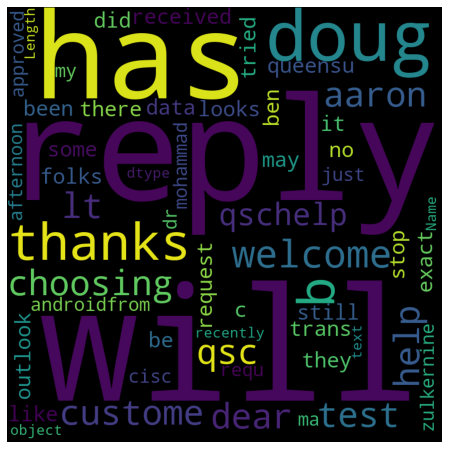

In [29]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                    , min_font_size = 20).generate(str(dataset['text']))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [31]:
dataset.describe(include="all")

,id,ticket_id,type_id,sender_id,from_x,to,cc,subject,reply_to,message_id,...,internal,preferences,updated_by_id,created_by_id,origin_by_id,created_at,updated_at,from_y,techmember,text
count,2860.000000,2860.000000,2860.000000,2860.000000,2860,2854,1330,2842,111,2843,...,2860,2846,2860.000000,2860.000000,15.000000,2860,2860,2860,2860.0,2860
unique,NaN,NaN,NaN,NaN,360,433,385,1947,11,2842,...,2,55,NaN,NaN,NaN,2860,2860,8,8.0,2845
top,NaN,NaN,NaN,NaN,David Lamb,"""help@cs.queensu.ca""","""help@cs.queensu.ca""",Re: Request To restart VM,Christian Muise <christian.muise@queensu.ca>,<CAPyXqb9aZPH6ivAwUp9h1UbaPof=TXfHL5Y_7pufEhD_...,...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,NaN,NaN,NaN,2021-04-14 19:29:52.645,2021-04-15 18:47:54.963,Aaron Visser,1.0,this message cannot be displayed due to html p...
freq,NaN,NaN,NaN,NaN,118,668,244,23,98,2,...,2858,1880,NaN,NaN,NaN,1,1,1142,1142.0,5
mean,3588.606643,975.273776,1.031469,2.001399,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,263.184266,263.183566,131.866667,NaN,NaN,NaN,NaN,NaN
std,1954.712803,566.868165,0.445398,0.037378,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,307.291940,307.292532,262.274901,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
25%,1939.750000,481.500000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,58.000000,58.000000,7.500000,NaN,NaN,NaN,NaN,NaN
50%,3571.500000,928.500000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,154.000000,154.000000,9.000000,NaN,NaN,NaN,NaN,NaN
75%,5267.500000,1458.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,268.000000,268.000000,76.500000,NaN,NaN,NaN,NaN,NaN


In [31]:
dataset.isnull().sum()

id                   0
ticket_id            0
type_id              0
sender_id            0
from_x               0
to                   6
cc                1530
subject             18
reply_to          2749
message_id          17
message_id_md5      17
in_reply_to       2860
content_type         0
references        2860
body                 0
internal             0
preferences         14
updated_by_id        0
created_by_id        0
origin_by_id      2845
created_at           0
updated_at           0
from_y               0
techmember           0
text                 0
dtype: int64

In [32]:
def missing_values_table(dataset):
        mis_val = dataset.isnull().sum()
        mis_val_percent = 100 * dataset.isnull().sum() / len(dataset)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [33]:
missing_values_table(dataset)

Your selected dataframe has 22 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
in_reply_to,2860,100.0
references,2860,100.0
origin_by_id,2845,99.5
reply_to,2749,96.1
cc,1530,53.5
subject,18,0.6
message_id,17,0.6
message_id_md5,17,0.6
preferences,14,0.5
to,6,0.2


In [34]:
# Get the columns with > 50% missing
missing_df = missing_values_table(dataset);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 60].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 22 columns.
There are 10 columns that have missing values.
We will remove 4 columns.


In [35]:
missing_columns

['in_reply_to', 'references', 'origin_by_id', 'reply_to']

In [36]:
dataset = dataset.drop(['in_reply_to', 'references', 'origin_by_id', 'reply_to'], axis=1)
dataset

,id,ticket_id,type_id,sender_id,from_x,to,cc,subject,message_id,message_id_md5,...,body,internal,preferences,updated_by_id,created_by_id,created_at,updated_at,from_y,techmember,text
0,1,1,5,2,Nicole Braun,NaN,NaN,NaN,NaN,NaN,...,Welcome! Thank you for choosing Zammad. You ...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,4,2,2021-04-14 19:29:52.645,2021-04-15 18:47:54.963,Doug Martin,3,welcome thank you for choosing zammad you will...
1,7,6,5,2,Nicole Braun,NaN,NaN,NaN,NaN,NaN,...,"Dear Aaron,This is a test ticket. I'm a custom...",f,NaN,2,2,2021-04-15 20:59:53.563,2021-04-15 20:59:53.563,Aaron Visser,1,dear aaron this is a test ticket i m a custome...
2,23,8,1,2,Ben Hall,QSC Help,NaN,RE: MED-i external research access [Ticket#93008],<YTBPR01MB3487D020DE15C09E5F761B13D1489@YTBPR0...,e278cbc10543747936714776d0d993a2,...,And a reply. From: QSC Help &lt;qschelp@queens...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,7,7,2021-04-20 14:49:49.685,2021-04-20 14:49:49.685,Ben Hall,2,and a reply from qsc help lt qschelp queensu c...
3,18,8,1,3,"""Queen's School of Computing Helpdesk""",mousavi@queensu.ca,NaN,Thanks for your inquiry (Data),<20210419174123.13.842536821035@helpdesk.cs.qu...,cb1065bea7d8c05e5ae831363acd2223,...,Your request (Ticket#93013) has been received ...,f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,1,1,2021-04-19 17:41:23.259,2021-04-19 18:20:59.876,Ben Hall,2,your request ticket has been received and will...
4,17,8,1,2,Parvin Mousavi,"Ben Hall , Amoon Jamzad",QSC Help,Data,<YTXPR0101MB19042F5A29844BF000FCB036C0499@YTXP...,34a78b19a03064c6e217f5d27296ca5c,...,"Hi Ben, No Exact is not new. /they did data tr...",f,--- !ruby/hash:ActiveSupport::HashWithIndiffer...,11,11,2021-04-19 17:41:22.953,2021-04-19 18:20:59.877,Ben Hall,2,hi ben no exact is not new they did data trans...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,6920,1992,1,2,Jeremy Banks,"""help@cs.queensu.ca""",Ryan Zhou,Fw: TA applications for CISC324,<YT2PR01MB44642F6DF7BED6E1B8EB706CED869@YT2PR0...,b93b88081c76f26c40c3a09e6cc85b13,...,"IT folks, Looks like there may still be some i...",f,---\nsend-auto-response: true\nis-auto-respons...,869,869,2023-03-22 16:18:19.851,2023-03-22 16:18:24.97,Ben Hall,2,it folks looks like there may still be some is...
2856,6922,1989,1,2,Zhimin Zhao,Doug Martin,"""Help@cs.queensu.ca""",Re: Help to stop the docker containers running...,<YTBPR01MB28784560FC19B497D57C79F1F2869@YTBPR0...,7a3b378dea9c5955bf999f523b9c6b89,...,"Hi, Doug. Thanks for your reply, I tried to st...",f,---\nsend-auto-response: true\nis-auto-respons...,793,793,2023-03-22 17:04:23.715,2023-03-22 17:04:23.715,Doug Martin,3,hi doug thanks for your reply i tried to stop ...
2857,6928,1989,1,2,Zhimin Zhao,Doug Martin,"""Help@cs.queensu.ca""",Re: Help to stop the docker containers running...,<YTBPR01MB28789BBAACD3579193AFA078F2869@YTBPR0...,5283e1ad80074330d696360b2499197c,...,thanks$B!*(B Get Outlook for AndroidFrom: Do...,f,---\nsend-auto-response: true\nis-auto-respons...,793,793,2023-03-22 18:52:13.395,2023-03-22 18:52:13.395,Doug Martin,3,thanks b b get outlook for androidfrom doug ma...
2858,6923,1993,1,2,Mackenzie Tummers,"""help@cs.queensu.ca""",NaN,Desktop PC installation for Dr. Mohammad Zulke...,<YT1PR01MB423488163CC70FDA7B06FBAAC9869@YT1PR0...,5a8ef1122a64cff7cc5d5e733e700d6a,...,"Hi, Dr. Mohammad Zulkernine has approved my r...",f,---\nsend-auto-response: true\nis-auto-respons...,208,208,2023-03-22 17:18:18.391,2023-03-22 17:18:18.391,Lindsey Kelly,4,hi dr mohammad zulkernine has approved my requ...


In [37]:
dataset = dataset.drop(['from_x','to','cc', 'internal','preferences','message_id','message_id_md5'], axis=1)

In [38]:
dataset = dataset.drop(['subject'], axis=1)

In [39]:
dataset = dataset.drop(['content_type'], axis=1)

In [40]:
dataset = dataset.drop(['body'], axis=1)

In [41]:
dataset = dataset.drop(['created_at','updated_at'], axis=1)

In [42]:
dataset

,id,ticket_id,type_id,sender_id,updated_by_id,created_by_id,from_y,techmember,text
0,1,1,5,2,4,2,Doug Martin,3,welcome thank you for choosing zammad you will...
1,7,6,5,2,2,2,Aaron Visser,1,dear aaron this is a test ticket i m a custome...
2,23,8,1,2,7,7,Ben Hall,2,and a reply from qsc help lt qschelp queensu c...
3,18,8,1,3,1,1,Ben Hall,2,your request ticket has been received and will...
4,17,8,1,2,11,11,Ben Hall,2,hi ben no exact is not new they did data trans...
...,...,...,...,...,...,...,...,...,...
2855,6920,1992,1,2,869,869,Ben Hall,2,it folks looks like there may still be some is...
2856,6922,1989,1,2,793,793,Doug Martin,3,hi doug thanks for your reply i tried to stop ...
2857,6928,1989,1,2,793,793,Doug Martin,3,thanks b b get outlook for androidfrom doug ma...
2858,6923,1993,1,2,208,208,Lindsey Kelly,4,hi dr mohammad zulkernine has approved my requ...


#Splitting and train and test data
from sklearn.model_selection import train_test_split

X = dataset.drop(['techmember'], axis=1)
y = dataset['techmember']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X

plt.hist(y_train)

np.random.seed(500)

Corpus = dataset

Corpus['text'].dropna(inplace=True)

Corpus

Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(Corpus['text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    Corpus.loc[index,'text_final'] = str(Final_words)                             


Corpus

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['techmember'],test_size=0.3)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)

print(Train_X_Tfidf)

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(Train_Y.data)
test_vectors = vectorizer.transform(Test_Y.data)

In [43]:
from io import StringIO


In [44]:
col = ['from_y', 'text']
dataset = dataset[col]
dataset = dataset[pd.notnull(dataset['text'])]
dataset.columns = ['from_y', 'text']
dataset['techmember'] = dataset['from_y'].factorize()[0]
techmemberds = dataset[['from_y', 'techmember']].drop_duplicates().sort_values('techmember')
tmf= dict(techmemberds.values)
ftm = dict(techmemberds[['techmember', 'from_y']].values)
dataset.head()

,from_y,text,techmember
0,Doug Martin,welcome thank you for choosing zammad you will...,0
1,Aaron Visser,dear aaron this is a test ticket i m a custome...,1
2,Ben Hall,and a reply from qsc help lt qschelp queensu c...,2
3,Ben Hall,your request ticket has been received and will...,2
4,Ben Hall,hi ben no exact is not new they did data trans...,2


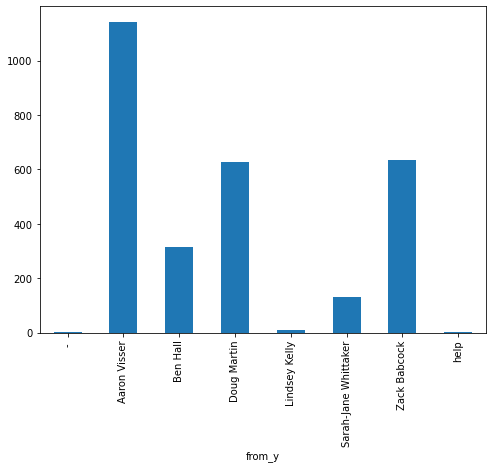

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
dataset.groupby('from_y').text.count().plot.bar(ylim=0)
plt.show()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(dataset.text).toarray()
labels = dataset.from_y
features.shape

(2860, 21537)

In [52]:
labels

0         Doug Martin
1        Aaron Visser
2            Ben Hall
3            Ben Hall
4            Ben Hall
            ...      
2855         Ben Hall
2856      Doug Martin
2857      Doug Martin
2858    Lindsey Kelly
2859    Lindsey Kelly
Name: from_y, Length: 2860, dtype: object

from sklearn.feature_selection import chi2
import numpy as np
N = 2
for from_y, techmember in sorted(techmemberds.items()):
  features_chi2 = chi2(features, labels == techmember)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(from_y))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()


product = from_y
consumer complain narrative = text
category_id = techmember
category_id_df = techmemberds
category_to_id = tmf
id_to_category = ftm

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

https://fasttext.cc/docs/en/supervised-tutorial.html

documents = [ dict(
            email=open("conference/%d.txt" % n).read().strip(), 
            category='conference') for n in range(1,372) ]
documents.extend([ dict( 
            email=open("job/%d.txt" % n).read().strip(),
            category='job') for n in range(1,275)])
documents.extend([ dict( 
            email=open("spam/%d.txt" % n).read().strip(), 
            category='spam') for n in range(1,799) ])


from email import message_from_string
from BeautifulSoup import BeautifulSoup as BS
from re import split
for n in range(len(documents)):
  html = message_from_string(documents[n]['email']).get_payload()
  while not isinstance(html, str):                 # Multipart problem
    html = html[0].get_payload()
  text = ' '.join(BS(html).findAll(text=True))      # Strip HTML
  documents[n]['html'] = html
  documents[n]['text'] = text
  documents[n]['words'] = split('\W+', text)        # Find words


import nltk
all_words = nltk.FreqDist(w.lower() for d in documents for w in d['words'])
word_features = all_words.keys()[:2000]


def document_features(document):
  document_words = set(document['words'])
  features = {}
  for word in word_features:
    features['contains(%s)' % word] = (word in document_words)
  return features


import random
random.shuffle(documents)

featuresets = [(document_features(d), d['category']) for d in documents]
train_set, test_set = featuresets[721:], featuresets[:721]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.svm import SVC 

In [62]:
pip install scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['techmember'],test_size=0.3)

In [64]:
train_data = dataset(shuffle=True, random_state=42)
test_data = dataset(shuffle=True, random_state=42)

TypeError: 'DataFrame' object is not callable

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(train_data.data)
test_vectors = vectorizer.transform(test_data.data)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()
model.fit(train_vectors, train_data.target)
predicted_labels = model.predict(test_vectors)

print('Accuracy:', accuracy_score(test_data.target, predicted_labels))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10], 'fit_prior': [True, False]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid.fit(train_vectors, train_data.target)

print('Best Parameters:', grid.best_params_)
print('Accuracy:', grid.best_score_)

In [ ]:
Best Parameters: {'alpha': 0.1, 'fit_prior': False}
Accuracy: 0.9606685951513537

In [ ]:

  
style.use('fivethirtyeight')
  
# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
  
# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
color = ['r', 'b', 'g', 'k']
  
iris = pd.read_csv("iris-data.txt").values
  
  
features = iris[0:150, 2:4]
level1 = np.zeros(150)
level2 = np.zeros(150)
level3 = np.zeros(150)
  
# level1 contains 1 for class1 and 0 for all others.
# level2 contains 1 for class2 and 0 for all others.
# level3 contains 1 for class3 and 0 for all others.
for i in range(150):
    if i>= 0 and i<50:
        level1[i] = 1
    elif i>= 50 and i<100:
        level2[i] = 1
    elif i>= 100 and i<150:
        level3[i]= 1
  
# create 3 svm with rbf kernels
svm1 = SVC(kernel ='rbf')
svm2 = SVC(kernel ='rbf')
svm3 = SVC(kernel ='rbf')
  
# fit each svm's
svm1.fit(features, level1)
svm2.fit(features, level2)
svm3.fit(features, level3)
  
fig, ax = plt.subplots()
X0, X1 = iris[:, 2], iris[:, 3]
xx, yy = make_meshgrid(X0, X1)
  
# plot the contours
plot_contours(ax, svm1, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.8)
plot_contours(ax, svm2, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.3)
plot_contours(ax, svm3, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.5)
  
color = ['r', 'b', 'g', 'k']
  
for i in range(len(iris)):
    plt.scatter(iris[i][2], iris[i][3], s = 30, c = color[int(iris[i][4])])
plt.show()

In [63]:
classifier = HistGradientBoostingClassifier(
  learning_rate = 0.5,
  max_depth = 6
)

MERF(fixed_effects_model=RandomForestRegressor(n_estimators=300, max_iterations=100, n_jobs=-1))

In [66]:
#list of sentences
text = dataset['text']

#instantiate the class
cv = CountVectorizer()

#tokenize and build vocab
cv.fit(text)

print(cv.vocabulary_)

#transform the text
vector = cv.transform(text)

print(vector.toarray())

{'welcome': 19297, 'thank': 17301, 'you': 20415, 'for': 6137, 'choosing': 2691, 'zammad': 20650, 'will': 19436, 'find': 5973, 'updates': 18385, 'and': 720, 'patches': 12849, 'at': 1091, 'https': 7797, 'org': 12510, 'online': 12392, 'documentation': 4431, 'is': 8558, 'available': 1220, 'get': 6648, 'involved': 8482, 'discussions': 4265, 'contributing': 3307, 'participate': 12808, 'regards': 14721, 'your': 20428, 'team': 17150, 'dear': 3900, 'aaron': 24, 'this': 17392, 'test': 17244, 'ticket': 17449, 'customer': 3631, 'need': 11585, 'some': 16355, 'help': 7391, 'nicole': 11709, 'braunthe': 1913, 'project': 13677, 'reply': 14891, 'from': 6289, 'qsc': 14204, 'lt': 10384, 'qschelp': 14206, 'queensu': 14262, 'ca': 2149, 'gt': 7019, 'sent': 15869, 'tuesday': 17858, 'april': 905, 'amto': 700, 'ben': 1523, 'hall': 7172, 'bhall': 1603, 'subject': 16756, 're': 14540, 'med': 10813, 'external': 5602, 'research': 14945, 'access': 132, 'me': 10797, 'replying': 14893, 'to': 17594, 'see': 15805, 'exact

In [67]:
def punctuation_removal(data_string):
    punctuations = [",", ".", "?", "!", "'", "+", "(", ")"]
    for punc in punctuations:
        data_string = data_string.replace(punc, "")
    return data_string

In [68]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [69]:
def stopword_removal(tokens):
    stopwords = ['of', 'on', 'i', 'am', 'this', 'is', 'a', 'was']
    filtered_tokens = []
    for token in tokens:
            if token not in stopwords: 
                filtered_tokens.append(token)
    return filtered_tokens

In [70]:
def stemming(filtered_tokens):
    root_to_token = {'you have':['youve'],
                    'select':['selected', 'selection'],
                    'it is':['its'],
                    'move':['moving'],
                    'photo':['photos'],
                    'success':['successfully', 'successful']
    }

    base_form_tokens = []
    for token in filtered_tokens:
        for base_form, token_list in root_to_token.items():
            if token in token_list:
                base_form_tokens.append(base_form)
            else:
                base_form_tokens.append(token)
    return base_form_tokens

In [71]:
text = dataset['text']

In [72]:
tokens = []
for text in text:
    text = text[0].lower().split()
    for word in text:
        clean_word = punctuation_removal(word)
        tokens.append(clean_word)
tokens = set(tokens)
filtered_tokens = stopword_removal(tokens)
base_form_tokens = stemming(filtered_tokens)

In [73]:
unique_words = []
unique_words = set(base_form_tokens)

In [74]:
feature_vec = {}
for word in range(len(unique_words)):
    feature_vec[word] = word in base_form_tokens
pair = (feature_vec, text[1])
train_data.append(pair)

IndexError: list index out of range

In [75]:
train_data = []
for text in text:
    tokens = []
    word_list = text[0].lower().split()
    for word in word_list:
        clean_word = punctuation_removal(word)
        tokens.append(clean_word)
    filtered_tokens = stopword_removal(tokens)
    base_form_tokens = stemming(filtered_tokens)
    feature_vec = {}
    for word in unique_words:
        feature_vec[word] = word in base_form_tokens
    pair = (feature_vec, text[0]) 
    train_data.append(pair)

In [76]:
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)
output = classifier.classify(test_features)

NameError: name 'test_features' is not defined

https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

In [77]:
def testing(email_str):
    tokens = []
    word_list = email_str.lower().split()
    for word in word_list:
        clean_word = punctuation_removal(word)
        tokens.append(clean_word)
    filtered_tokens = stopword_removal(tokens)
    base_form_tokens = stemming(filtered_tokens)
    test_features = {}
    for word in unique_words:
        test_features[word] = word in base_form_tokens
    output = classifier.classify(test_features)
    return output

https://dev.to/saxenamansi/classifying-spam-emails-using-basic-python-2m70#:~:text=Text%20preprocessing%20and%20email%20classification%20using%20basic%20Python,...%204%204.%20Applying%20Naive%20Bayes%20Classifier%20

In [65]:
text_vec = CountVectorizer().fit_transform(dataset['text'])

X_train, X_test, y_train, y_test = train_test_split(text_vec, dataset['text'], test_size = 0.45, random_state = 42, shuffle = True)

In [66]:
classifier = GradientBoostingClassifier(
  n_estimators = 10, #how many decision trees to build
  learning_rate = 0.5, #learning rate
  max_depth = 6
)

In [ ]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))

In [83]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

ValueError: could not convert string to float: "Dear Sarah,\xa0Sorry for the late reply.\xa0Thanks for your kind assistance. Now, the account works well.\xa0Thanks and best wishes,Xu\xa0From: Sarah-Jane WhittakerSent: Thursday, September 1, 2022 3:38 PMTo: Xu WangCc: 'help@cs.queensu.ca';  Selim Akl; Ben HallSubject: Re: updates related to TAs' access to Onq page\xa0Hello, Xu.\xa0Your student NetID was enrolled in 102 as an Instructor, not your staff NetID (xw41). I fixed it in OnQ - it should work now.\xa0Thanks,Sarah\xa0\xa0On 9/1/22 15:04, Ben Hall wrote:Hi Selim,\xa0Sarah is away for the afternoon; I am sure that this will be sorted tomorrow.\xa0Ben\xa0\xa0From: Selim Akl &lt;akl@queensu.ca&gt;Date: Thursday, September 1, 2022 at 3:02 PMTo: 'help@cs.queensu.ca'  &lt;help@cs.queensu.ca&gt;Cc: Xu Wang &lt;xu.wang@queensu.ca&gt;Subject: Fwd: updates related to TAs' access to Onq pageDear colleagues,I am forwarding the message below from Eric Xu Wang the Assistant Lecturer in CISC102 this Fall. I would appreciate it very much if you could help Eric obtain Instructor privileges on the OnQ page for CISC102. This will allow him to enroll the 14 TAs in the course. Managing the TAs in CISC102 is one of Eric's responsibilities in CISC102.Thank you very much in advance,Selim -------- Forwarded Message -------- Subject: updates related to TAs' access to Onq pageDate: Thu, 1 Sep 2022 14:47:01 -0400From: Xu Wang &lt;xu.wang@queensu.ca&gt;To: Selim Akl &lt;akl@queensu.ca&gt;\xa0Dear Dr. Akl,\xa0I have got some of the employee NetID of our TAs.I am trying to enroll them in CISC 102. However, I found two things. First, My employee ID (xw41) does not have access to the OnQ page. Second, my student ID (21xw23) can access the OnQ page. But my account does not have the authority to enroll new students.\xa0Now, I have sent an email to Debby to ask for help.\xa0Thanks and best wishes,Eric\xa0\xa0--Sarah-Jane Whittaker Information Technical Analyst, School of Computing, Queen’s UniversityChat on TeamsQueen’s University is situated on the territory of the Haudenosaunee and Anishinaabek.\xa0"

In [84]:
scores = cross_val_score(log, X_train, y_train, 
                         scoring='f1_macro', cv=10, n_jobs=-1)

NameError: name 'cross_val_score' is not defined

In [85]:
print(np.mean(scores))

NameError: name 'scores' is not defined

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
y_predh=log.predict(X_test)
y_test=y_test.astype('int')
print(classification_report(y_test, y_predh))

ValueError: could not convert string to float: '\xa0\xa0GetOutlook for iOSFrom: Laura ConnollySent: Wednesday, June 29, 2022 2:32:53 PMTo: Aaron Visser &lt;aaron.visser@queensu.ca&gt;Subject: E waste room 7th floor  Hi Aaron,Some maintenance guys are here trying to get into the e-waste room, would you be able to let them in?Best,Laura\xa0GetOutlook for iOS'

In [87]:
confusion_matrix(y_test,y_predh)

NameError: name 'y_predh' is not defined

In [88]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score
print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))

NameError: name 'y_predh' is not defined

In [89]:
lr = LogisticRegression(random_state= 42)
svc = SVC(random_state= 42)
rf = RandomForestClassifier(random_state= 42)
ada = AdaBoostClassifier(random_state= 42)
xgb = XGBClassifier(random_state= 42)
gnb = GaussianNB()

NameError: name 'SVC' is not defined

In [90]:
def evaluation(model, X_train, Y_train, X_test, Y_test):
    metrics = {} 
    model.fit(X_train, Y_train)  # Training
    Y_pred = model.predict(X_test) # Predicts
    
    metrics['Accuracy_test'] = accuracy_score(Y_test , Y_pred)  
    
    metrics['Recall_test'] = recall_score(Y_test , Y_pred)
    
    metrics['Precision_test'] = precision_score(Y_test , Y_pred)
    
    metrics['F1_Score_test'] = f1_score(Y_test , Y_pred)
    
    metrics['5:1-Recall:Prec'] = (5*recall_score(Y_test , Y_pred)+1*precision_score(Y_test , Y_pred))/6
    
    return metrics

https://stackoverflow.com/questions/69585176/using-sentence-bert-with-other-features-in-scikit-learn

https://lvngd.com/blog/text-normalization-natural-language-processing-python/

https://realpython.com/nltk-nlp-python/

https://towardsdatascience.com/natural-language-processing-with-python-b3aad16f578f

https://builtin.com/machine-learning/nlp

https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34